<a href="https://colab.research.google.com/github/Pramod-N/DS-Learning/blob/main/Titanic/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.impute import KNNImputer
from scipy.stats import kstest

In [ ]:
#load dataset
titanic = sns.load_dataset("titanic")

In [ ]:
stat_score = []
def create_list(key,value):
    obj = {key:value}
    stat_score.append(obj)

## Basic Analysis

In [ ]:
titanic.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Percentage of null values in each feature:")
(titanic.isna().sum()/titanic.shape[0])*100

Percentage of null values in each feature:


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

**Observations-**

1. Numerical Features - age, fare. 
2. Categorical features - other features.
3. age has ~20% null values.
4. Numerical features have higher variance. 
5. pclass,embarked,survived seems similar/same to class,embark_town,alive another respectively. 
6. Most passengers where alone.
7. most people were men.
8. Most of them died.
9. deck has ~80% of null values. Safely assume to be dropped.

### Missing Value

In [ ]:
titanic["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
titanic["embarked"].fillna("S",inplace=True)

### Duplicate Values

In [ ]:
titanic["embarked"] = titanic["embarked"].astype(str)

titanic["embark_town"] = titanic["embark_town"].astype(str)

In [ ]:
print("print unique values - Survived",np.unique(titanic["survived"]))
print("print unique values - alive",np.unique(titanic["alive"]))

print("print unique values - PClass",np.unique(titanic["pclass"]))
print("print unique values - Class",np.unique(titanic["class"]))

print("print unique values - Embarked",np.unique(titanic["embarked"]))
print("print unique values - Embarked town",np.unique(titanic["embark_town"]))

print unique values - Survived [0 1]
print unique values - alive ['no' 'yes']
print unique values - PClass [1 2 3]
print unique values - Class ['First' 'Second' 'Third']
print unique values - Embarked ['C' 'Q' 'S']
print unique values - Embarked town ['Cherbourg' 'Queenstown' 'Southampton' 'nan']


In [ ]:
#Proving if point 5 is true. 
conversation_names = {
    'alive': {'no':0, 'yes':1},
    'class': {'First': 1, 'Second': 2,'Third': 3},
    'embark_town': {'Cherbourg': 'C','Queenstown':'Q','Southampton':'S'}
}

titanic["embarked"] = titanic["embarked"].astype(object)

titanic["embark_town"] = titanic["embark_town"].astype(object)
titanic.replace(conversation_names,inplace=True)

In [ ]:
print("Alive v/s Survived are they equal:",titanic["alive"].equals(titanic["survived"]))
print("class v/s PClass are they equal:",titanic["class"].equals(titanic["pclass"]))
print("embark_town v/s embarked are they equal:",titanic["embark_town"].equals(titanic["embarked"]))

Alive v/s Survived are they equal: True
class v/s PClass are they equal: True
embark_town v/s embarked are they equal: False


So our initial analysis was right, these features are same and so one of them can be dropped. 

In [ ]:
titanic.drop(["alive","class","embark_town","deck"],inplace=True,axis=1)

In [ ]:
print("shape of data:",titanic.shape)
titanic.describe(include="all")

shape of data: (891, 11)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,891,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,man,True,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,537,537,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN


In [ ]:
titanic.sample(10).head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
570,1,2,male,62.0,0,0,10.5000,S,man,True,True
474,0,3,female,22.0,0,0,9.8375,S,woman,False,True
836,0,3,male,21.0,0,0,8.6625,S,man,True,True
818,0,3,male,43.0,0,0,6.4500,S,man,True,True
713,0,3,male,29.0,0,0,9.4833,S,man,True,True


**Observations-**

1. Numerical Features - age and fare 
2. Categorical features - rest all features except target and numerical features.
3. Target feature - survived

## Numerical feature Analysis

This section handles the numerical feature analysis with hypothesis tests and handling null values for the numeric features. 

### Hypothesis tests

In [ ]:
def levene_test(sample_a,sample_b):
    '''
    H0 - All the samples from the populations have equal variances.
    H1 - samples from the population havr unequal variance
    '''
    stat,pvalue = stats.levene(sample_a,sample_b)

    if pvalue <= 0.05:
        return "H1"
    else:
        return "H0"

In [ ]:
def shapiro_test(sample):
    '''
    H0 - The sample from the populations follow normal distribution
    H1 - The sample from the populations dont follow normal distribution
    '''
    stat,pvalue = stats.shapiro(sample)

    if pvalue <= 0.05:
        return "H1"
    else:
        return "H0"

In [ ]:
def mannwhitney_test(sample_a,sample_b):
    '''
    Mann-Whitney U Test - The samples are independent and tried to give a rank to the samples. The samples are combined together and given a rank. if for all observation, value v0<=v1, we reject null hypothesis.

    H0 - Sample distributions are equal.
    H1 - Sample distributions are not equal.

    '''
    stat,pvalue = stats.mannwhitneyu(sample_a,sample_b)

    if pvalue <= 0.05:
        return "H1"
    else:
        return "H0"

In [ ]:
def kruskalsWallis_test(sample_a,sample_b):
    '''
    kruskal-Wallis H Test - This shows if atleast one sample if different from the other. It does not indicate where and how many of these values differ.
    H0 - All the samples from the populations have equal variances.
    H1 - samples from the population havr unequal variance
    '''
    stat,pvalue = stats.kruskal(sample_a,sample_b)

    if pvalue <= 0.05:
        return stat,"H1"
    else:
        return stat,"H0"

In [ ]:
def wilcoxon_test(sample_a,sample_b,number_of_samples):
    '''
    Wilcoxon test - it does not assume the samples are independent.
    H0 - All the samples from the populations have equal variances.
    H1 - samples from the population havr unequal variance
    '''
    stat,pvalue = stats.wilcoxon(sample_a.sample(number_of_samples),sample_b.sample(number_of_samples))

    if pvalue <= 0.05:
        return "H1"
    else:
        return "H0"

In [ ]:
def ks_test(feature,disttype):
    ''' 
    Running the ks test (non parmateric test) to let us know, wheather the age dist follow the normal disb
    H0: The disb is normally disb
    H1: The disb is not normally disb
    '''
    ttest,pval=kstest(feature,disttype)

    if pval<=0.05:
        return "H1"
    else:
        return "H0"


### Plots

In [ ]:
def distplots(sample,hist):
    sns.distplot(sample,kde=True,hist=hist)
    plt.grid()
    plt.show()

In [ ]:
def scatterplots(sample_a,sample_b,hue):
    sns.scatterplot(x=sample_a,y=sample_b,hue=hue)
    plt.grid()
    plt.show()

In [ ]:
def boxplot(sample_a,sample_b,hue,data):
    plt.figure(figsize=(15,10))
    sns.boxplot(x=sample_a,y=sample_b,hue=hue,data=data)
    plt.grid()
    plt.show()

### knn Imputer

In [ ]:
def knn_imputer(data,n_neighbors):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_data = imputer.fit_transform(data)
    df_temp = pd.DataFrame(imputed_data)
    df_temp.columns = data.columns
    return df_temp

### fare

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


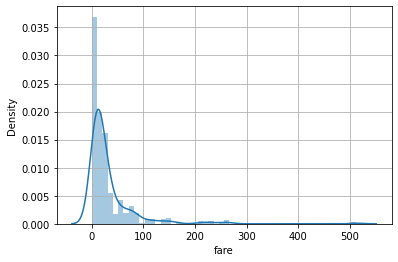

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


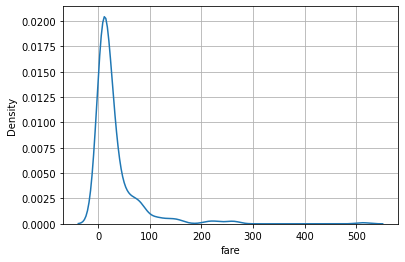

In [ ]:
#Plot the distribution of fare
(distplots(titanic["fare"],True))
(distplots(titanic["fare"],False))

From the plot, The fare seems to follow right skewed distribution. Lets prove using some statistical tests or hypothesis test. 

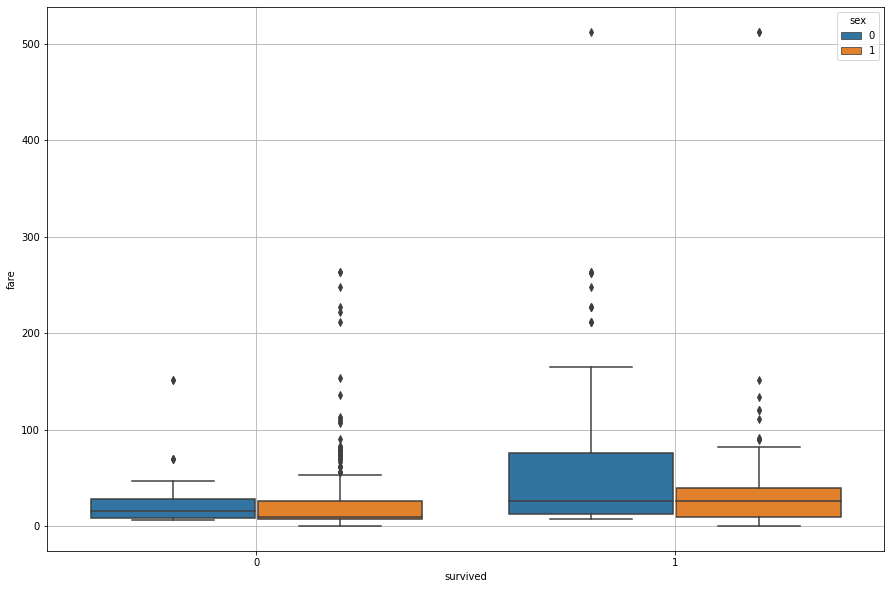

In [ ]:
#Plot the box plot
boxplot('survived','fare','sex',titanic)

In [ ]:
alive = titanic[titanic["survived"] == 1]
dead = titanic[titanic["survived"] == 0]

In [ ]:
reslevenetest = levene_test(alive["fare"],dead["fare"])
print("Accepted Hypothesis:",reslevenetest)

Accepted Hypothesis: H1


This means that the the variance between the samples are different.

In [ ]:
resshapirotest = shapiro_test(alive["fare"])
print("Accepted Hypothesis for alive samples of fare:",resshapirotest)

resshapirotest = shapiro_test(dead["fare"])
print("Accepted Hypothesis for dead samples of fare:",resshapirotest)

Accepted Hypothesis for alive samples of fare: H1
Accepted Hypothesis for dead samples of fare: H1


This means that the fare does not follow normal distribution. 
So for further hypothesis testing we have to use non parametric tests. 

In [ ]:
s,reskruskalstest = kruskalsWallis_test(alive["fare"],dead["fare"])
create_list('fare',s)
print("Accepted Hypothesis:",reskruskalstest)

Accepted Hypothesis: H1


In [ ]:
manwhitneytest = mannwhitney_test(alive["fare"],dead["fare"])
print("Accepted Hypothesis:",manwhitneytest)

Accepted Hypothesis: H1


In [ ]:
wilcoxontest = wilcoxon_test(alive["fare"],dead["fare"],min(len(alive),len(dead)))

print("Accepted Hypothesis:",wilcoxontest)

Accepted Hypothesis: H1


The above non parametric tests lets us know that the fare has some kind of influence on the survivalability and it is statistically significant in determining the survivalability. 

### Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


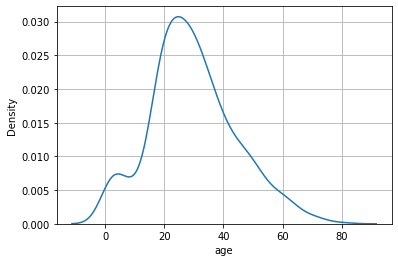

None


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


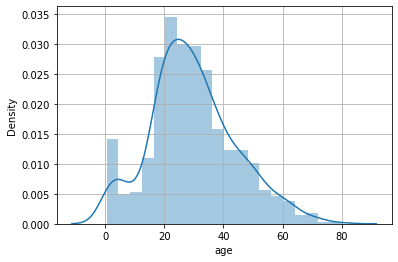

None


In [ ]:
print(distplots(titanic["age"],False))

print(distplots(titanic["age"],True))

In [ ]:
conversation_names = {
    'sex': {'female': 0, 'male':1},
    'embarked': {'C':1,'Q':2,'S':3},
    'who': {'child':2,'man':1,'woman':0},
    'adult_male': {True:1, False:0},
    'deck': {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7},
    'alone': {True:1, False:0}
}

titanic.replace(conversation_names,inplace=True)

In [ ]:
print(f'''Since the age has around {titanic['age'].isna().sum()} missing values, the strategy herd is to impute the age column using kNN imputer with default parameter of 5''')

titanic_ks_test=titanic.copy()

df = knn_imputer(titanic_ks_test,5)
titanic_ks_test['age'] = df['age']  # update only the desired column
print('after the imputing the ages with KNN imputer, the remaining missing values in ages is:',titanic_ks_test['age'].isna().sum())

Since the age has around 177 missing values, the strategy herd is to impute the age column using kNN imputer with default parameter of 5
after the imputing the ages with KNN imputer, the remaining missing values in ages is: 0


In [ ]:
reskstest = ks_test(titanic_ks_test["age"],'norm')
print("Accepted Hypothesis:",reskstest)

Accepted Hypothesis: H1


From the distribution and ks statistic test  the age does not follow normal distribution. 

In [ ]:
alive_ages = titanic[titanic["survived"] == 1]
dead_ages = titanic[titanic["survived"] == 0]

In [ ]:
reslevenetest = levene_test(alive_ages["age"],dead_ages["age"])
print("Accepted Hypothesis:",reslevenetest)

Accepted Hypothesis: H0


This means that the variance of the two samples are same.

In [ ]:
np.nanvar(alive_ages["age"]),np.nanvar(dead_ages["age"])

(222.76016880023784, 200.37499860938055)

The variance seems different. So checking if the null values are causing levene test to cause the variance to be same.

In [ ]:
titanic.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,2.536476,0.789001,0.602694,0.602694
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.791503,0.594291,0.489615,0.489615
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,2.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,3.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,3.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,2.000000,1.000000,1.000000


In [ ]:
titanic_imputation = knn_imputer(titanic,10)

In [ ]:
titanic_imputation.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,30.140418,0.523008,0.381594,32.204208,2.536476,0.789001,0.602694,0.602694
std,0.486592,0.836071,0.477990,13.345515,1.102743,0.806057,49.693429,0.791503,0.594291,0.489615,0.489615
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,2.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,3.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,3.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,2.000000,1.000000,1.000000


In [ ]:
alive_ages = titanic_imputation[titanic_imputation["survived"] == 1]
dead_ages = titanic_imputation[titanic_imputation["survived"] == 0]

reslevenetest = levene_test(alive_ages["age"],dead_ages["age"])
print("Accepted Hypothesis:",reslevenetest)

Accepted Hypothesis: H1


This means that the levene test does not work if there are null values in the features. So after imputing its clear that the variance of age is different for alive and dead

In [ ]:
resshapirotest = shapiro_test(alive_ages["age"])
print("Accepted Hypothesis for alive samples of age:",resshapirotest)

resshapirotest = shapiro_test(dead_ages["age"])
print("Accepted Hypothesis for dead samples of age:",resshapirotest)

Accepted Hypothesis for alive samples of age: H1
Accepted Hypothesis for dead samples of age: H1


This means that the age feature does not follow the normal distribution. So we conduct non parametric tests

In [ ]:
s,reskruskalstest = kruskalsWallis_test(alive_ages["age"],dead_ages["age"])
create_list('age',s)
print("Accepted Hypothesis:",reskruskalstest)

Accepted Hypothesis: H1


In [ ]:
manwhitneytest = mannwhitney_test(alive_ages["age"],dead_ages["age"])
print("Accepted Hypothesis:",manwhitneytest)

Accepted Hypothesis: H1


In [ ]:
wilcoxontest = wilcoxon_test(alive_ages["age"],dead_ages["age"],min(len(alive_ages),len(dead_ages)))
print("Accepted Hypothesis:",wilcoxontest)

Accepted Hypothesis: H1


This means that the there is a significant difference between the alive and dead based on age. 

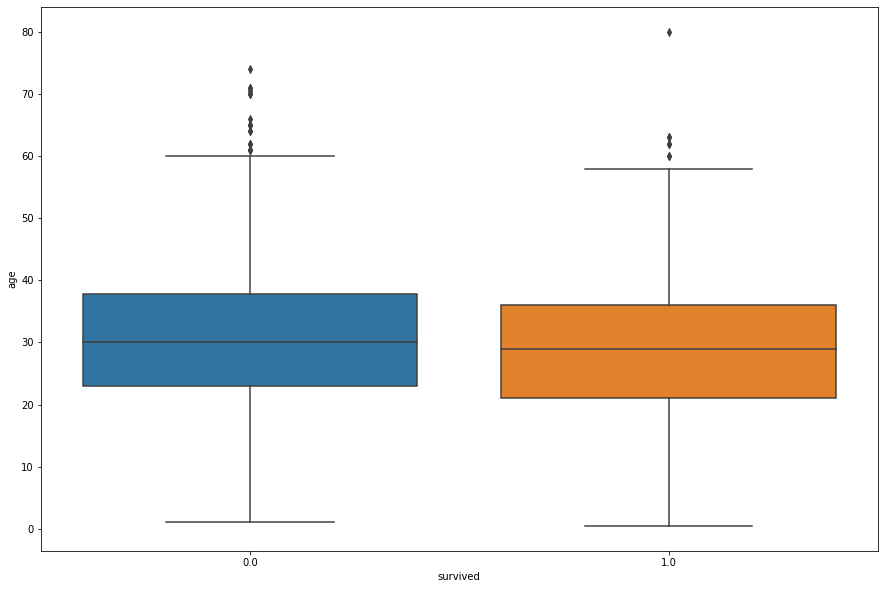

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y='age',x='survived',data=titanic_imputation)
plt.show()

The median values appears to be real close. So need further analysis on its significance on affecting the survival

####Binned Age

Creating a new feature from age by binning the ages into different categories. 

In [ ]:
titanic_imputation["age"].isna().sum()

0

In [ ]:
np.min(titanic_imputation["age"]),np.max(titanic_imputation["age"])

(0.42, 80.0)

In [ ]:
'''
dividing the continuous ages into categorical values -
Ages      Value

0-10    -  1
10-20   -  2
20-30   -  3
30-40   -  4
40-50   -  5
50-60   -  6
60-70   -  7
70-80   -  8
'''
def binned_age(age):
    if 0<age<=10:
        return 1
    if 10<age<=20:
        return 2
    if 20<age<=30:
        return 3
    if 30<age<=40:
        return 4
    if 40<age<=50:
        return 5
    if 50<age<=60:
        return 6
    if 60<age<=70:
        return 7
    if 70<age<=80:
        return 8


titanic_imputation["binned_age"] = titanic_imputation.age.apply(binned_age)

###Correlation b/w numerical features

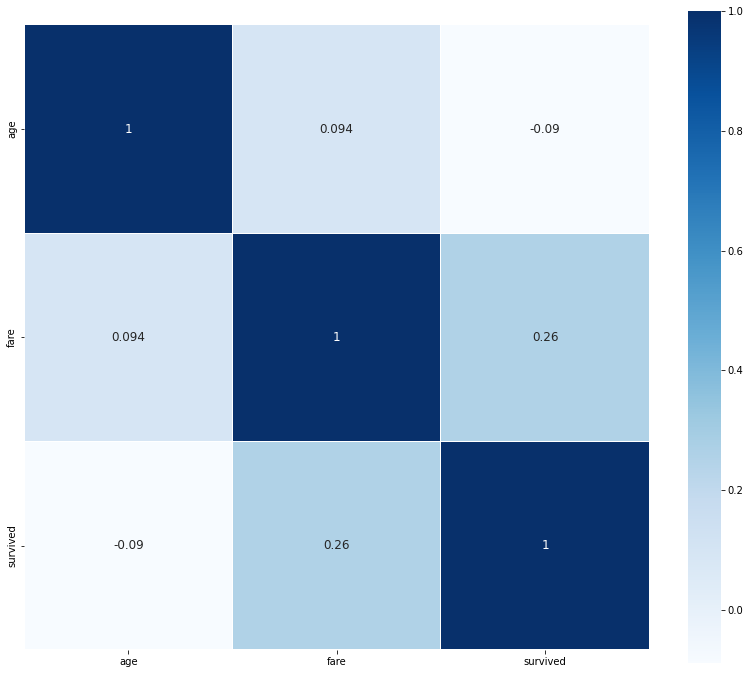

In [ ]:
#survived can be added here, since it has only two categories and we converted it to numeric 
numeric_features = titanic_imputation[["age","fare","survived"]]
correlation_numeric = numeric_features.corr(method='spearman')

columns = correlation_numeric.index

corr_matrix = np.corrcoef(titanic_imputation[columns].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(corr_matrix, vmax=1, linewidths=0.01,square=True,annot=True,cmap='Blues',
            linecolor="white",xticklabels = columns.values ,annot_kws = {'size':12},yticklabels = columns.values)

**Observations-**

1. The fare and age are not highly correlated. 
2. Age and Survived are not highly correlated. 
3. fare is related to survived to some extent.

## Categorical Feature Analysis

In [ ]:
categorical_features = titanic_imputation.drop(["fare","age"],axis=1)

### Hypothesis Test

In [ ]:
def construct_contingency(feature_a,feature_b,IsNormalize=False):
  if IsNormalize:
      contingency = pd.crosstab(feature_a,feature_b,normalize='index')
  else:
      contingency = pd.crosstab(feature_a,feature_b)
  return contingency

In [ ]:
'''
H0 = the distributions are independent
H1 - the distributions are dependent
'''
def chi_square_test(feature_a,feature_b):
    contingency = construct_contingency(feature_a,feature_b)
    c, pval, dof, expected = stats.chi2_contingency(contingency)
    return c,contingency,pval

### Plots

In [ ]:
def plot_heatmap(feature_a,feature_b):
    figure,ax = plt.subplots(1,2,figsize=(12,12))
    sns.heatmap(ax=ax[0],data=construct_contingency(feature_a,feature_b,True),annot=True)
    ax[0].set_title("Normalized over index")
    c = pd.crosstab(feature_a,feature_b,normalize='columns')
    sns.heatmap(ax=ax[1],data=c,annot=True)
    ax[1].set_title("Normalized over columns")
    plt.show()

### pclass

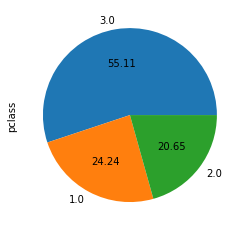

In [ ]:
categorical_features["pclass"].value_counts().plot(kind='pie',autopct='%.2f')

The accepted hypothesis is : H1


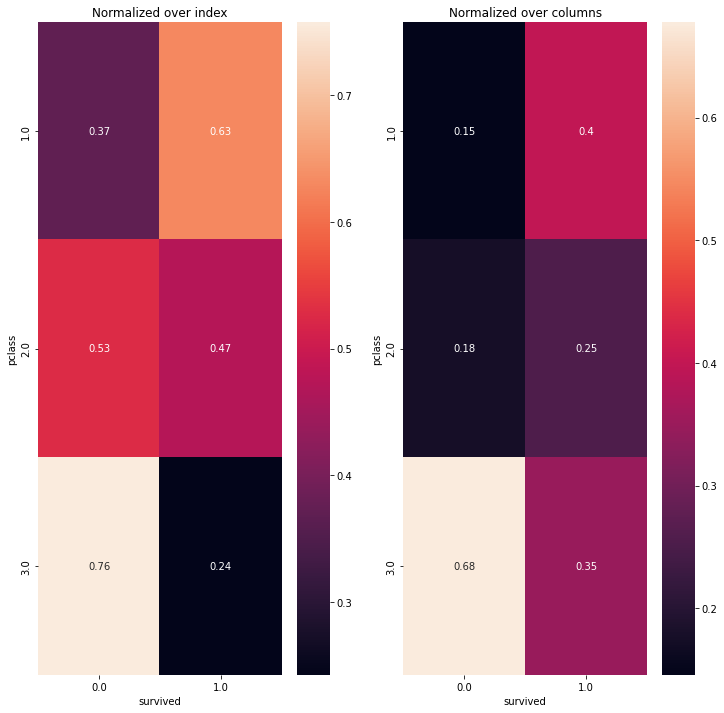

In [ ]:
statscore,contingency,pval = chi_square_test(categorical_features["pclass"],categorical_features["survived"])
create_list('pclass',statscore)

print("The accepted hypothesis is :","H1" if pval <= 0.05 else "H0")

plot_heatmap(categorical_features["pclass"],categorical_features["survived"])

The above heatmap shows that -
1. If you belong to higher class, then you have higher/better chance of survival. 
2. If the person didnt survive, then there is a high probablity that the person belonged to lower class. 
3. If the person belongs to 2nd class then it might not be so clear if person survived. 

### sex

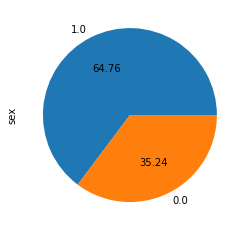

In [ ]:
titanic_imputation["sex"].value_counts().plot(kind='pie',autopct="%.2f")

The accepted hypothesis is : H1


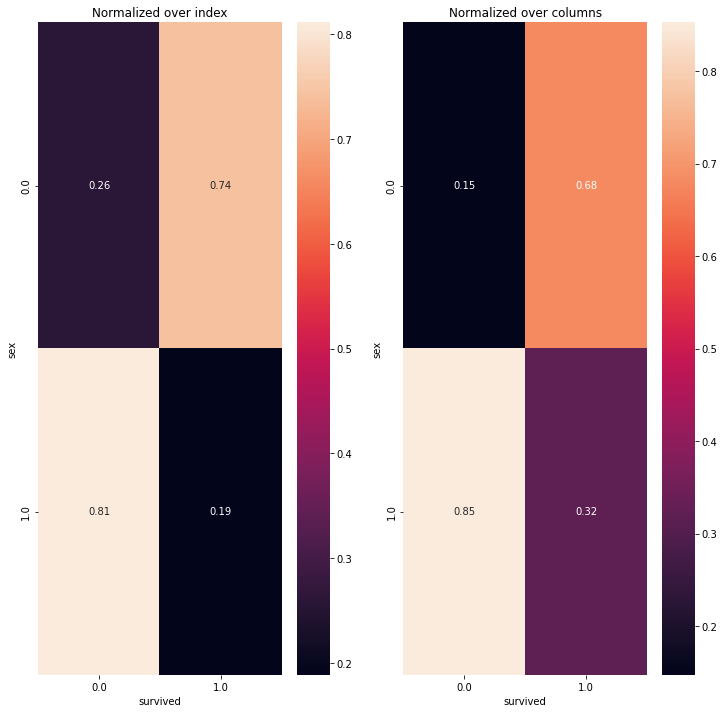

In [ ]:
statscore,contingency,pval = chi_square_test(categorical_features["sex"],categorical_features["survived"])
create_list('sex',statscore)

print("The accepted hypothesis is :","H1" if pval <= 0.05 else "H0")

plot_heatmap(categorical_features["sex"],categorical_features["survived"])

Female survival rate is higher. 

### sibsp

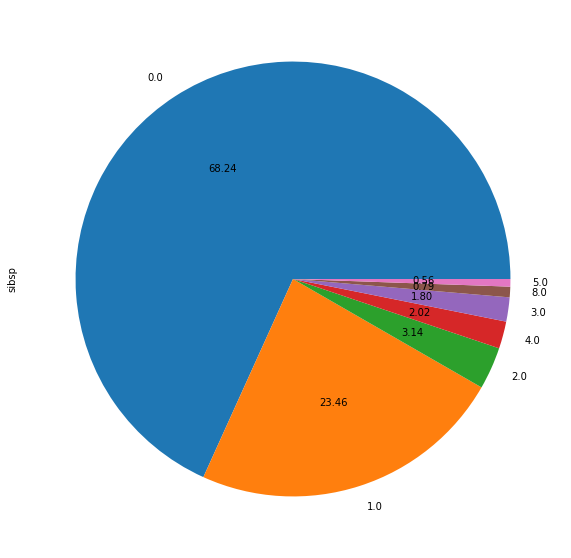

In [ ]:
plt.figure(figsize=(10,10))
titanic_imputation["sibsp"].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

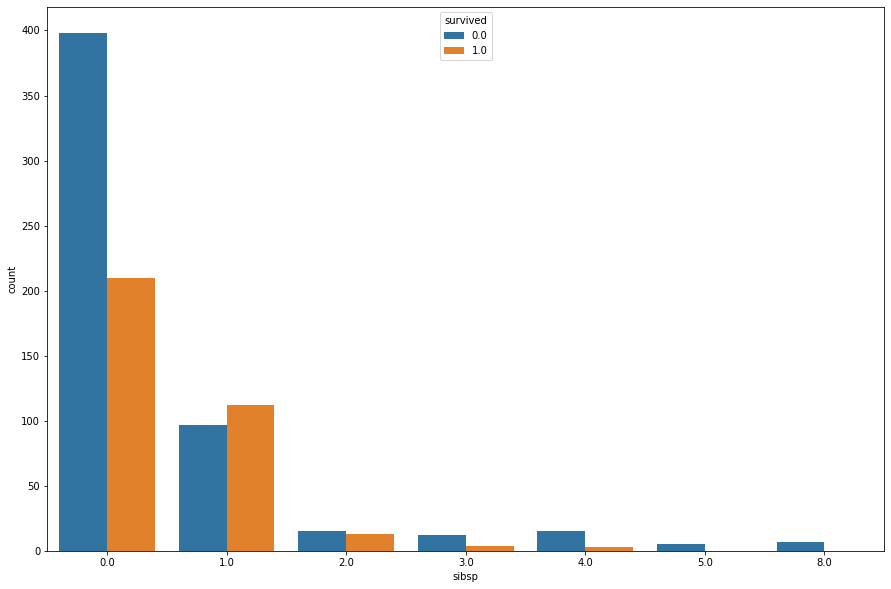

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='sibsp',hue='survived',data=titanic_imputation)
plt.show()

The accepted hypothesis is : H1


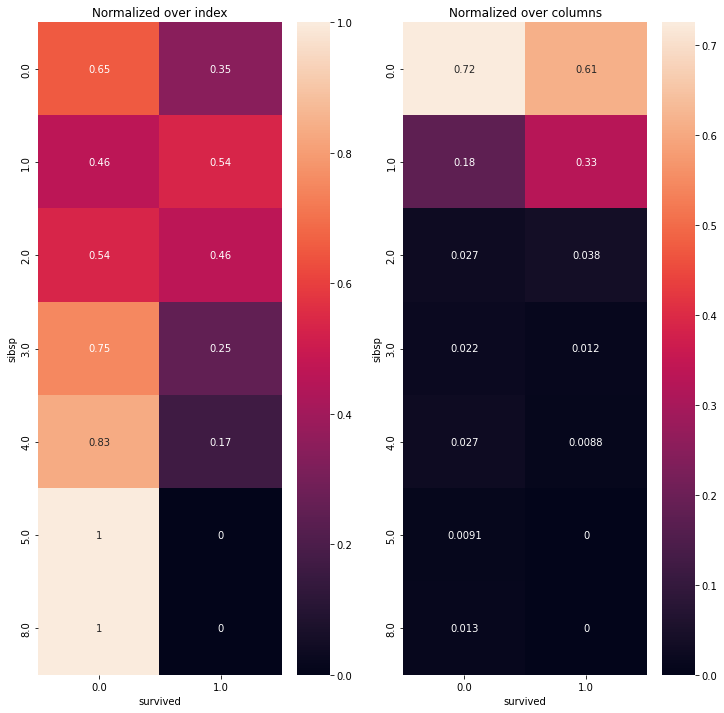

In [ ]:
statscore,contingency,pval = chi_square_test(categorical_features["sibsp"],categorical_features["survived"])
create_list('sibsp',statscore)

print("The accepted hypothesis is :","H1" if pval <= 0.05 else "H0")

plot_heatmap(categorical_features["sibsp"],categorical_features["survived"])

1. Other than having 0 sibsp, as the number of sibsp increases then survival rate decreases.
2. More than 2 sibsp are very less and have less impact on the survival. 
3. If the person survived or not survived, there is a high chance that he/she had 0 sibsp.

### parch

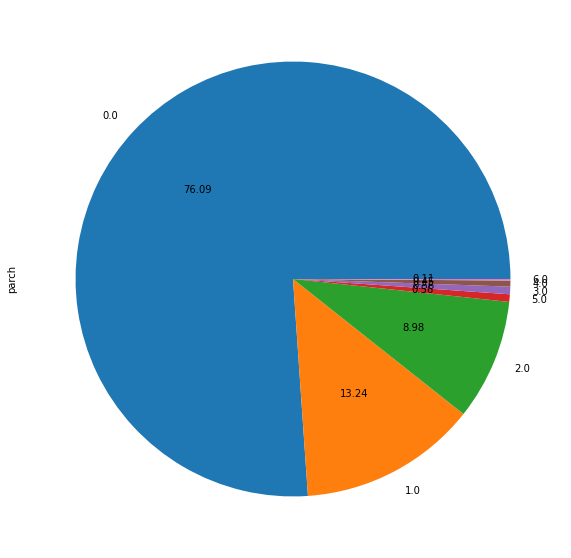

In [ ]:
plt.figure(figsize=(15,10))
titanic_imputation["parch"].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

The accepted hypothesis is : H1


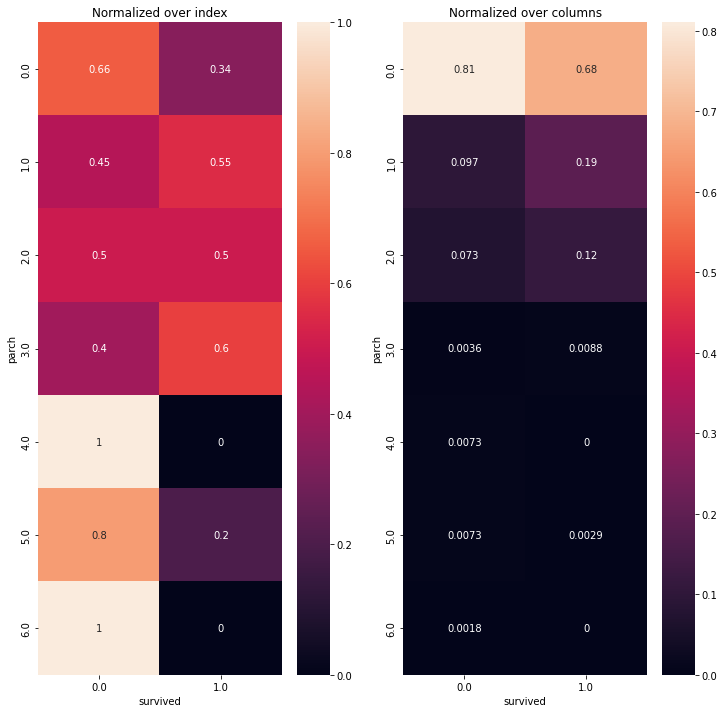

In [ ]:
statscore,contingency,pval = chi_square_test(titanic_imputation["parch"],titanic_imputation["survived"])
create_list('parch',statscore)
print("The accepted hypothesis is :","H1" if pval <= 0.05 else "H0")

plot_heatmap(categorical_features["parch"],categorical_features["survived"])

1. If he/she survived, then high chance that they had 0 parch. Next best chance is he has 1 or 2 parch
2. If he/she died, then there is again a high chance that they had 0 parch. 

### Who

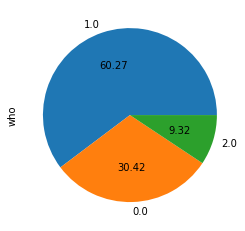

In [ ]:
titanic_imputation["who"].value_counts().plot(kind='pie',autopct="%.2f")

The accepted hypothesis: H1


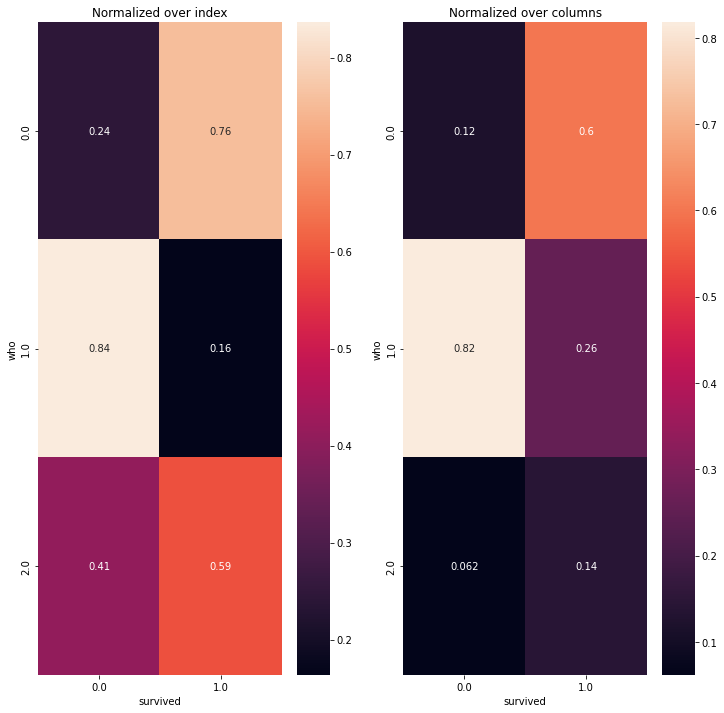

In [ ]:
statscore,contingency,pval = chi_square_test(titanic_imputation["who"],titanic_imputation["survived"])
create_list('who',statscore)

print("The accepted hypothesis:","H1" if pval <= 0.05 else "H0")

plot_heatmap(titanic_imputation["who"],titanic_imputation["survived"])

So its clear that the woman and children survival is higher 

### adult male

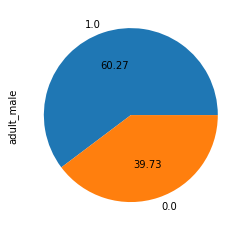

In [ ]:
titanic_imputation["adult_male"].value_counts().plot(kind='pie',autopct="%.2f")

The accepted hypothesis: H1


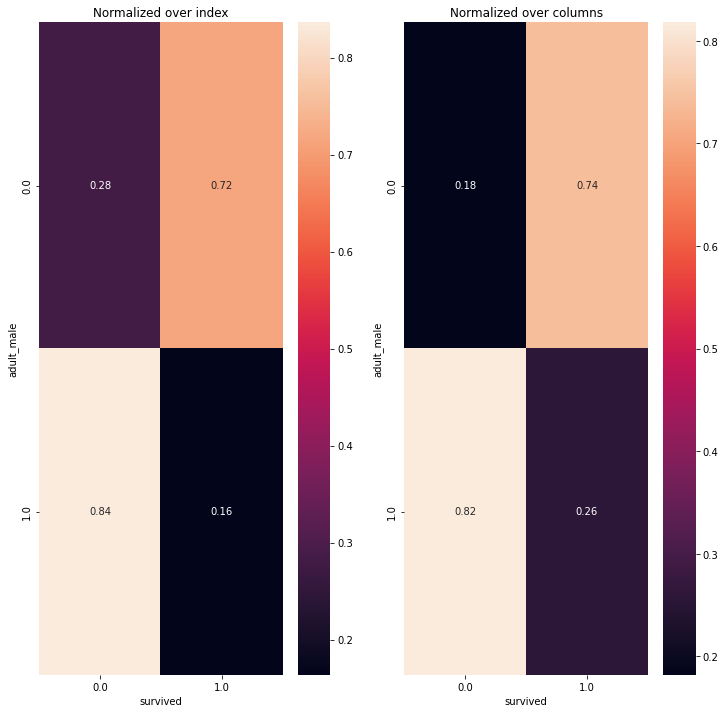

In [ ]:
statscore,contingency,pval = chi_square_test(titanic_imputation["adult_male"],titanic_imputation["survived"])
create_list('adult_male',statscore)

print("The accepted hypothesis:","H1" if pval <= 0.05 else "H0")

plot_heatmap(titanic_imputation["adult_male"],titanic_imputation["survived"])

adult male survival is less

### embarked

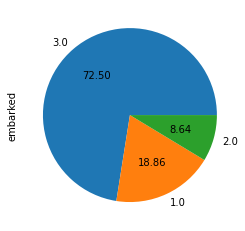

In [ ]:
titanic_imputation["embarked"].value_counts().plot(kind='pie',autopct="%.2f")

The accepted hypothesis: H1


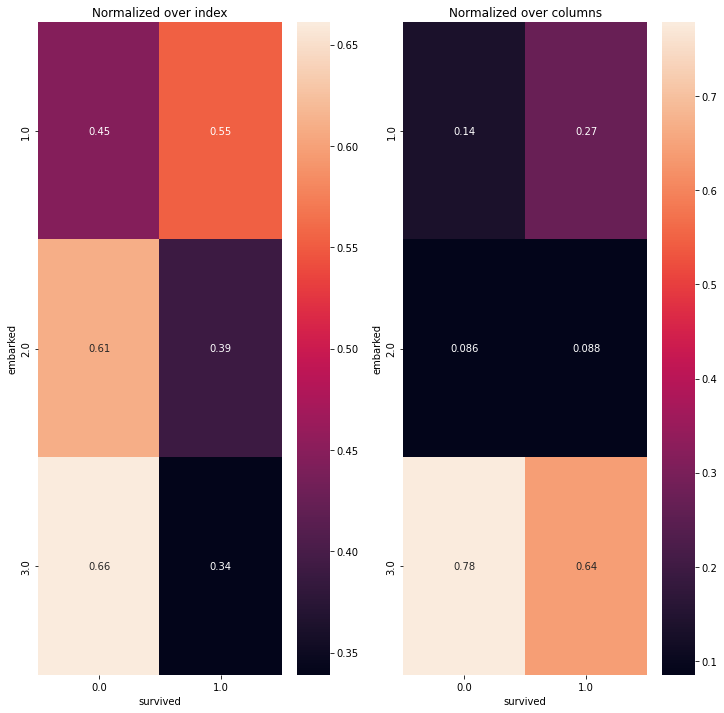

In [ ]:
statscore,contingency,pval = chi_square_test(titanic_imputation["embarked"],titanic_imputation["survived"])
create_list('embarked',statscore)

print("The accepted hypothesis:","H1" if pval <= 0.05 else "H0")

plot_heatmap(titanic_imputation["embarked"],titanic_imputation["survived"])

1. Survived or not, you mostly embarked from location 3(S).
2. Boarding at Q has no effect. (Number of folks embarked from this location is also less).


### Binned age

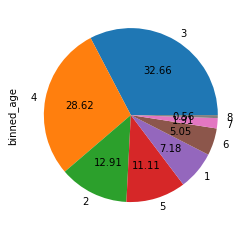

In [ ]:
titanic_imputation["binned_age"].value_counts().plot(kind='pie',autopct="%.2f")

The accepted hypothesis: H1


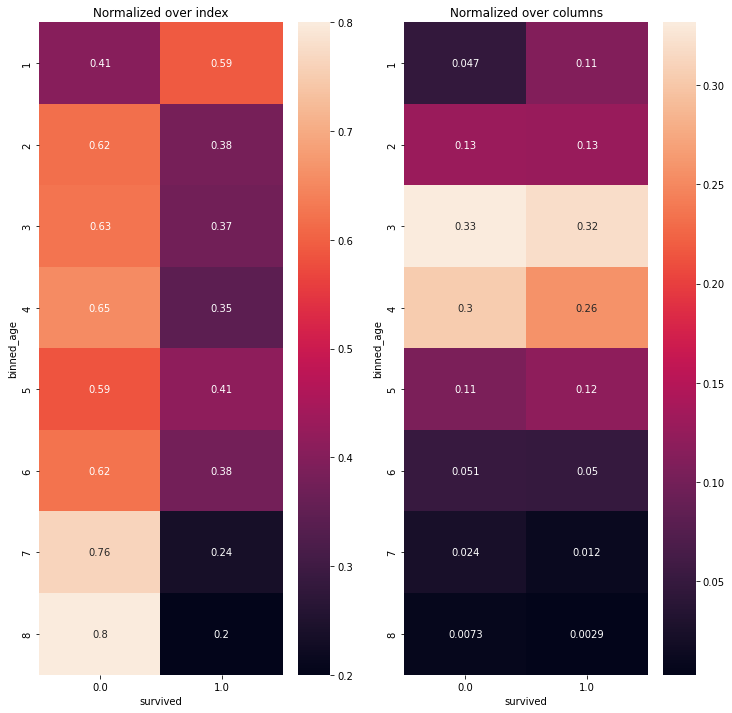

In [ ]:
statscore,contingency,pval = chi_square_test(titanic_imputation["binned_age"],titanic_imputation["survived"])
create_list('binned_age',statscore)

print("The accepted hypothesis:","H1" if pval <= 0.05 else "H0")

plot_heatmap(titanic_imputation["binned_age"],titanic_imputation["survived"])

### alone

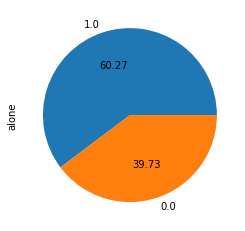

In [ ]:
titanic_imputation["alone"].value_counts().plot(kind='pie',autopct='%.2f')

The accepted hypothesis: H1


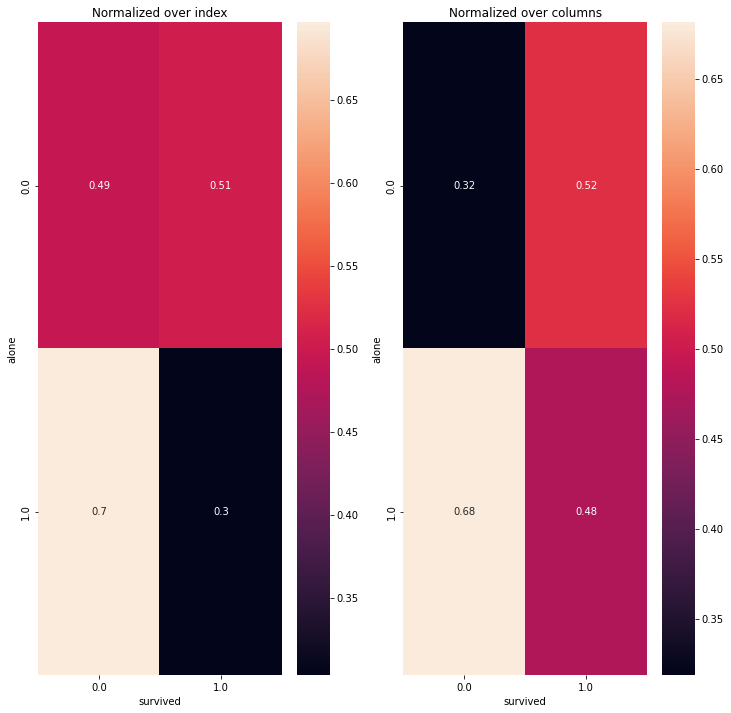

In [ ]:
statscore,contingency,pval = chi_square_test(titanic_imputation["alone"],titanic_imputation["survived"])
create_list('alone',statscore)
print("The accepted hypothesis:","H1" if pval <= 0.05 else "H0")

plot_heatmap(titanic_imputation["alone"],titanic_imputation["survived"])

Being alone has reduced the survival possibility. However if the person is not alone, then its hard to determine the survival just based on it. 

### Feature Analysis b/w input features

From above it might seem following - 

####1. alone, sibsp, parch can be related to one another.

The accepted hypothesis: H1


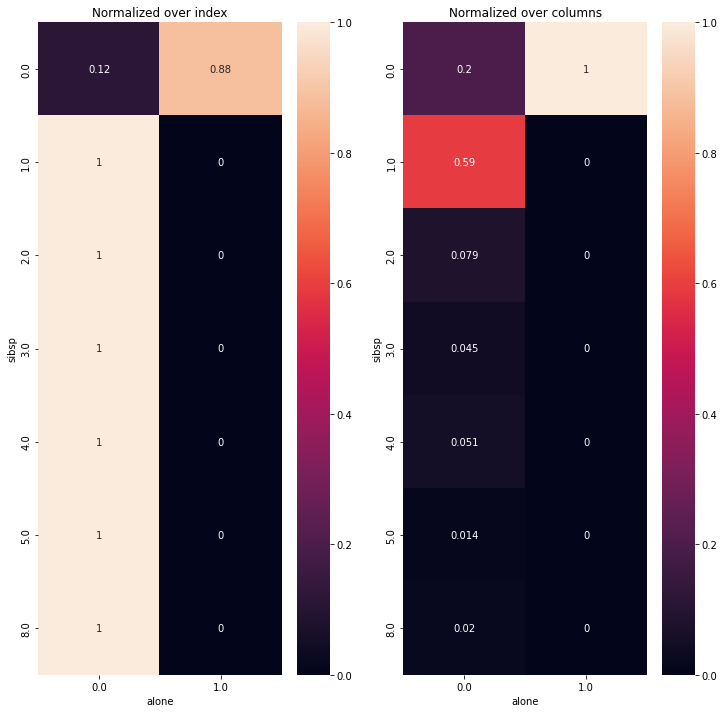

In [ ]:
##alone and sibsp
s,contingency,pval = chi_square_test(titanic_imputation["alone"],titanic_imputation["sibsp"])

print("The accepted hypothesis:","H1" if pval <= 0.05 else "H0")

plot_heatmap(titanic_imputation["sibsp"],titanic_imputation["alone"])

1. Given that the person is alone, then sibsp is 0
2. Given that person is not alone, then high chance that he/she has 1 sibsp.
3. Given that person is not alone, then he/she has more than 0 sibsp.


The accepted hypothesis: H1


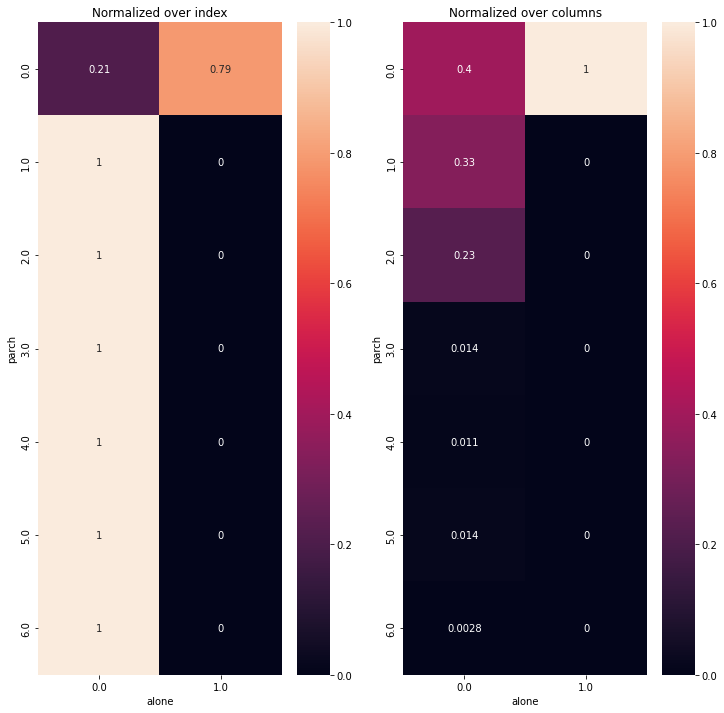

In [ ]:
##alone and parch
s,contingency,pval = chi_square_test(titanic_imputation["alone"],titanic_imputation["parch"])

print("The accepted hypothesis:","H1" if pval <= 0.05 else "H0")

plot_heatmap(titanic_imputation["parch"],titanic_imputation["alone"])

1. Given that the person is alone, then parch is 0
2. Given that person is not alone, then high chance that he/she has 0,1,2 parch.
3. Given that person is not alone, then he/she has more than 0 sibsp.

The accepted hypothesis: H1


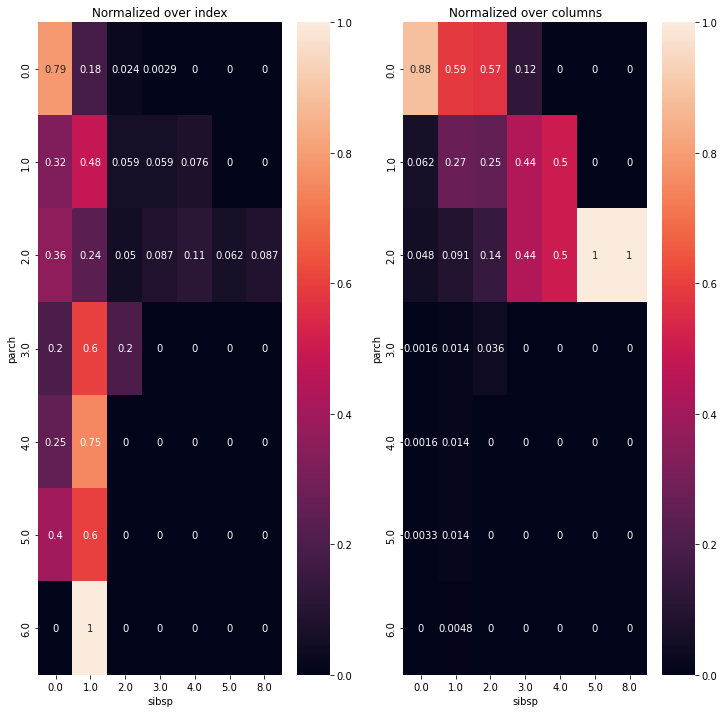

In [ ]:
##parch and sibsp
s,contingency,pval = chi_square_test(titanic_imputation["parch"],titanic_imputation["sibsp"])

print("The accepted hypothesis:","H1" if pval <= 0.05 else "H0")

plot_heatmap(titanic_imputation["parch"],titanic_imputation["sibsp"])

####2. sex, who and adult male can be related to one another.

The accepted hypothesis: H1


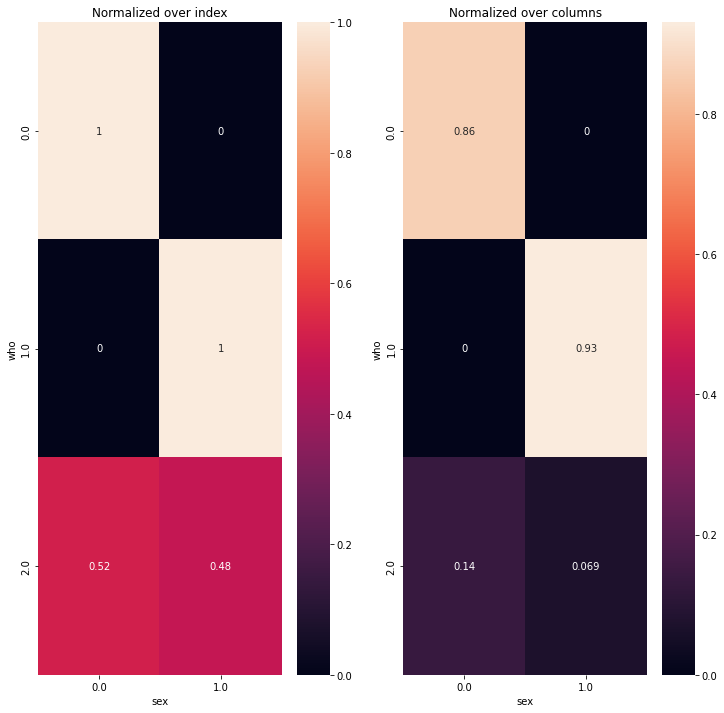

In [ ]:
##sex and who
s,contingency,pval = chi_square_test(titanic_imputation["sex"],titanic_imputation["who"])

print("The accepted hypothesis:","H1" if pval <= 0.05 else "H0")

plot_heatmap(titanic_imputation["who"],titanic_imputation["sex"])

The accepted hypothesis: H1


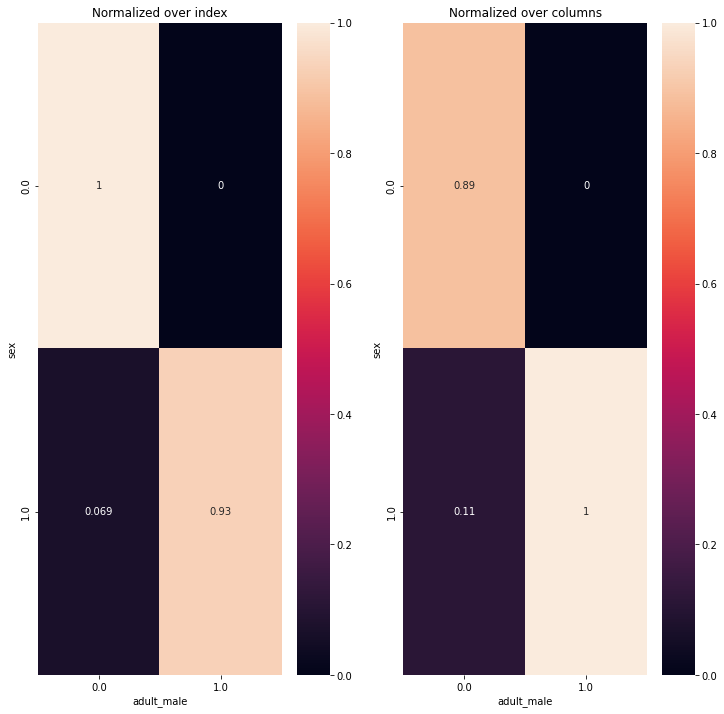

In [ ]:
##sex and adult_male
s,contingency,pval = chi_square_test(titanic_imputation["sex"],titanic_imputation["adult_male"])

print("The accepted hypothesis:","H1" if pval <= 0.05 else "H0")

plot_heatmap(titanic_imputation["sex"],titanic_imputation["adult_male"])

The accepted hypothesis: H1


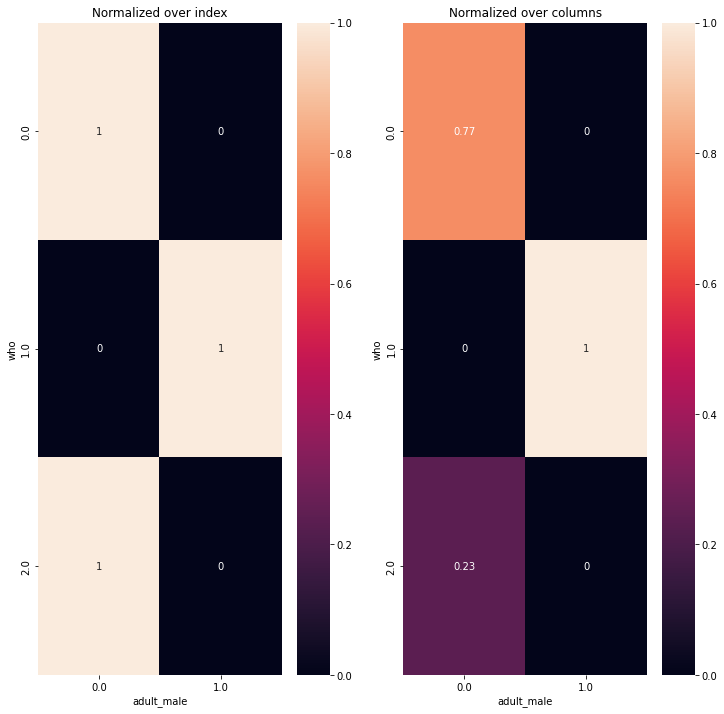

In [ ]:
##who and adult_male
s,contingency,pval = chi_square_test(titanic_imputation["who"],titanic_imputation["adult_male"])

print("The accepted hypothesis:","H1" if pval <= 0.05 else "H0")

plot_heatmap(titanic_imputation["who"],titanic_imputation["adult_male"])

if adult male is 1, then its sure that who can only be male.

## Final Observations

From above, my observations says -
1. pclass (class 2 mostly) does not help in determining survival.
2. survival is hard to predict using sibsp and parch. (Relation is not very clear including for the majority category)
3. Being alone also has doesn't have great impact on survival. 
4. embarked is not clear with respect to location 2. (Q) 
5. From the heatmap in numerical features, it is seen that the age does not have big impact on survival. 

We can run the feature importance test based on these and then come to conclusion on the above mentioned points. 

In [ ]:
print("Statistic score of the features under observation:\n",stat_score)

Statistic score of the features under observation:
 [{'age': 4.640766073735747}, {'fare': 93.27652830453901}, {'pclass': 102.88898875696056}, {'sex': 260.71702016732104}, {'sibsp': 37.2717929152043}, {'parch': 27.925784060236168}, {'who': 283.923050324233}, {'adult_male': 274.1753554159945}, {'embarked': 25.964452881874784}, {'binned_age': 16.340178802658976}, {'alone': 36.00051446773865}]


From the scores above, our observations seems to be right. So we drop those columns.

In [ ]:
titanic_f = titanic_imputation.drop(['sibsp','parch','embarked','alone','age'],axis=1)

In [ ]:
titanic_imputation

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,binned_age
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,3.0,1.0,1.0,0.0,3
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,0.0,4
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,3.0,0.0,0.0,1.0,3
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,3.0,0.0,0.0,0.0,4
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,3.0,1.0,1.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,3.0,1.0,1.0,1.0,3
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,3.0,0.0,0.0,1.0,2
888,0.0,3.0,0.0,24.0,1.0,2.0,23.4500,3.0,0.0,0.0,0.0,3
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,1.0,1.0,1.0,3


In [ ]:
titanic_f

,survived,pclass,sex,fare,who,adult_male,binned_age
0,0.0,3.0,1.0,7.2500,1.0,1.0,3
1,1.0,1.0,0.0,71.2833,0.0,0.0,4
2,1.0,3.0,0.0,7.9250,0.0,0.0,3
3,1.0,1.0,0.0,53.1000,0.0,0.0,4
4,0.0,3.0,1.0,8.0500,1.0,1.0,4
...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,13.0000,1.0,1.0,3
887,1.0,1.0,0.0,30.0000,0.0,0.0,2
888,0.0,3.0,0.0,23.4500,0.0,0.0,3
889,1.0,1.0,1.0,30.0000,1.0,1.0,3
